# Algorithmes gloutons

## Un problème d'organisation

Des conférenciers sont invités à présenter leurs exposés dans une salle. Mais leurs disponibilités ne leur permettent d’intervenir
qu’à des horaires bien définis. Le problème est de construire un planning d’occupation de la salle avec le plus grand nombre de
conférenciers.

Indiquez le critère global d'optimisation retenu.



**Réponse :**  
Placer le plus grand nombre de conférencier dans le planning.



On considère quatre conférenciers dont les créneaux horaires ne sont pas toujours disjoints :

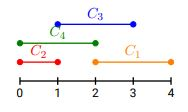

Indiquez tous les plannings possibles pour cette liste de conférencier.

**Réponse :**  
C2-C1  
C4-C1  
C2-C3  
C1  
C2  
C3  
C4  





Indiquez les solutions optimales

**Réponse :**  
Les trois premières



## Un algorithme glouton



On propose de trouver un algorithme glouton permettant de trouver une de ces solutions. Celui-ci va faire un premier choix de conférencier en suivant un critère à préciser. Ce choix ne sera jamais remis en question et la même stratégie sera appliquée pour trouver les conférenciers suivants.




Proposez deux critères locaux possibles de sélection des conférenciers.


**Réponse :**  
Choisir le conférencier qui finit le plus tot possible.  
Choisir les conférencier qui durent le moins longtemps.  
Choisir le conférencier qui commence en premier.



On propose la solution suivante :

- Classer les intervalles par heures de fin croissantes.
- Choisir le conférencier associé au premier intervalle.
- Choisir parmi les intervalles suivants celui du conférencier dont l’intervalles est compatible avec celui du premier conférencier.
- Recommencer ainsi avec les intervalles classés suivants jusqu’à ce qu’il n’y en ait plus à traiter.

Indiquez le critère retenu ici, justifiez le.

**Réponse :**  
Choisir le conférencier qui finit le plus tot possible.



Appliquez cet algorithme a la liste de conférencier précédente.



**Réponse :**  
C2-C3



Essayons plus compliqué :



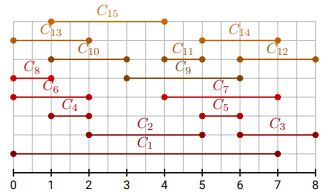



Donnez la liste des conférenciers classé par heure de fin croissante, en cas d'égalité sur les heures de fin, utilisez leur numéro pour les départager.



**Réponse :**   
C8 C4 C6 C13 C10 C15 C2 C11 C5 C9 C1 C7 C14 C3 C12


Sur cette liste, appliquez l'algorithme glouton proposé précédemment et indiquez le résultat. Ce résultat est-il optimum ?



**Réponse :**  
C8 C4 C2 C5 C3



## En python

Pour code cet algorithme en python, il faut tout d'abord créer une liste des conférenciers suivant une structure facilement manipulable et classable.

In [1]:
#En python, on pourrait présenter cette liste de conférenciers sous la forme d'une liste de tuple
tabIntervalles = [[2, 4, 'C1'],[0, 1, 'C2'],[1, 3, 'C3'],[0, 2, 'C4']]
# ou
tabIntervalles = [[0,7,'C1'],[2,5,'C2'],[6,8,'C3'],[1,2,'C4'],[5,6,'C5'],[0,2,'C6'],[4,7,'C7'],[0,1,'C8'],[3,6,'C9'],[1,3,'C10'],[4,5,'C11'],[6,8,'C12'],[0,2,'C13'],[5,7,'C14'],[1,4,'C15']]
print('Brute :', tabIntervalles)
#on peut les classer par heure de début croissante
print('Classée sur les heures de début :', sorted(tabIntervalles))
#ou par heure de fin croissante, ici, x[1] indique la colonne de référence du tri
print('Classée sur les heures de fin :', sorted(tabIntervalles, key=lambda x: x[1]))

Brute : [[0, 7, 'C1'], [2, 5, 'C2'], [6, 8, 'C3'], [1, 2, 'C4'], [5, 6, 'C5'], [0, 2, 'C6'], [4, 7, 'C7'], [0, 1, 'C8'], [3, 6, 'C9'], [1, 3, 'C10'], [4, 5, 'C11'], [6, 8, 'C12'], [0, 2, 'C13'], [5, 7, 'C14'], [1, 4, 'C15']]
Classée sur les heures de début : [[0, 1, 'C8'], [0, 2, 'C13'], [0, 2, 'C6'], [0, 7, 'C1'], [1, 2, 'C4'], [1, 3, 'C10'], [1, 4, 'C15'], [2, 5, 'C2'], [3, 6, 'C9'], [4, 5, 'C11'], [4, 7, 'C7'], [5, 6, 'C5'], [5, 7, 'C14'], [6, 8, 'C12'], [6, 8, 'C3']]
Classée sur les heures de fin : [[0, 1, 'C8'], [1, 2, 'C4'], [0, 2, 'C6'], [0, 2, 'C13'], [1, 3, 'C10'], [1, 4, 'C15'], [2, 5, 'C2'], [4, 5, 'C11'], [5, 6, 'C5'], [3, 6, 'C9'], [0, 7, 'C1'], [4, 7, 'C7'], [5, 7, 'C14'], [6, 8, 'C3'], [6, 8, 'C12']]


Ecrivez une fonction en python qui renvoi une solution de planning conformément à l'algorithme glouton proposé.

In [4]:
def planning1(tabInter):
    # tri des intervalles par valeurs croissantes de d'heures de fin
    tabInterT = sorted(tabInter, key=lambda x: x[1])
    # tableau du planning
    tabPlanning = [tabInterT[0][2]]
    # fin du planning provisoire
    fin = tabInterT[0][1]
    for i in range(1, len(tabInterT)):
        if tabInterT[i][0] >= fin:
            tabPlanning.append(tabInterT[i][2])
            fin = tabInterT[i][1]
    return tabPlanning

print(planning1(tabIntervalles))

['C8', 'C4', 'C2', 'C5', 'C3']


Cet exercice est inspiré de :
https://cache.media.eduscol.education.fr/file/NSI/76/4/RA_Lycee_G_NSI_algo-gloutons_1170764.pdf